In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.6555772994129159, 1: 2.106918238993711}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'number_of_vehicles_involved',
  'property_claim',
  'property_damage',
  'umbrella_limit',
  'vehicle_claim'],
 'LDA': ['collision_type',
  'day_incident_date',
  'incident_severity',
  'incident_type',
  'injury_claim',
  'insured_sex',
  'month_incident_date',
  'property_claim',
  'property_damage',
  'umbrella_limit'],
 'DTC': ['age',
  'auto_model',
  'capital-loss',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'policy_annual_premium',
  'property_claim',
  'vehicle_claim',
  'year_policy_bind_date'],
 'RD': ['auto_year',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_occupation',
  'months_as_customer',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim'],
 'KNC': ['policy_state',
  'umbrella_limit',
  'insured_sex',
  'incident_severity',
  'incident_city',
  'property_damage',
  'tota

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 72.985% (1.522%)
Accuracy LDA: 80.896% (1.608%)
Accuracy DTC: 82.239% (3.215%)
Accuracy RD: 81.940% (3.481%)
Accuracy KNC: 76.269% (4.284%)
Accuracy NB: 78.507% (2.471%)
Accuracy SVM: 75.672% (1.012%)
Accuracy NN: 78.657% (1.537%)
Accuracy BG: 78.209% (3.180%)


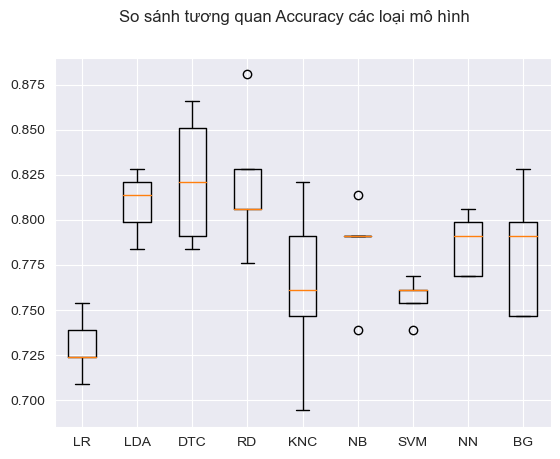

Precision LR: 44.988% (7.208%)
Precision LDA: 62.906% (13.392%)
Precision DTC: 58.973% (6.262%)
Precision RD: 66.616% (7.680%)
Precision KNC: 0.000% (0.000%)
Precision NB: 54.083% (8.137%)
Precision SVM: 48.163% (5.794%)
Precision NN: 56.597% (9.386%)
Precision BG: 55.262% (4.725%)


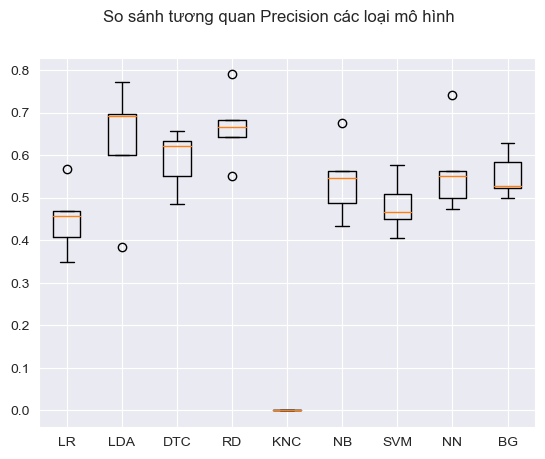

Recall LR: 73.003% (7.354%)
Recall LDA: 39.476% (11.810%)
Recall DTC: 59.073% (7.055%)
Recall RD: 49.512% (9.975%)
Recall KNC: 0.000% (0.000%)
Recall NB: 58.312% (3.745%)
Recall SVM: 70.362% (7.954%)
Recall NN: 45.263% (5.445%)
Recall BG: 41.588% (3.388%)


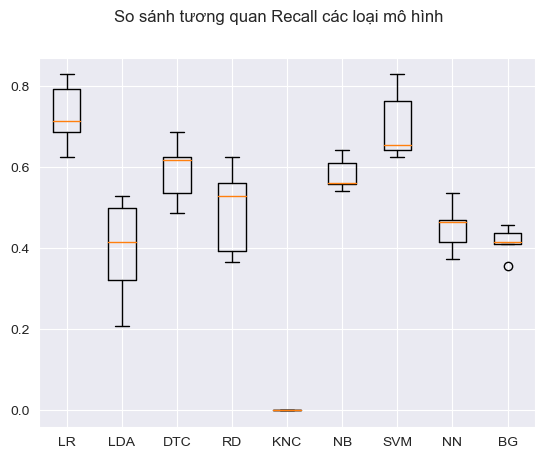

F1 LR: 55.562% (7.404%)
F1 LDA: 48.208% (12.334%)
F1 DTC: 60.091% (5.338%)
F1 RD: 56.026% (7.124%)
F1 KNC: 0.000% (0.000%)
F1 NB: 55.914% (5.513%)
F1 SVM: 57.169% (6.663%)
F1 NN: 50.056% (7.365%)
F1 BG: 47.321% (2.974%)


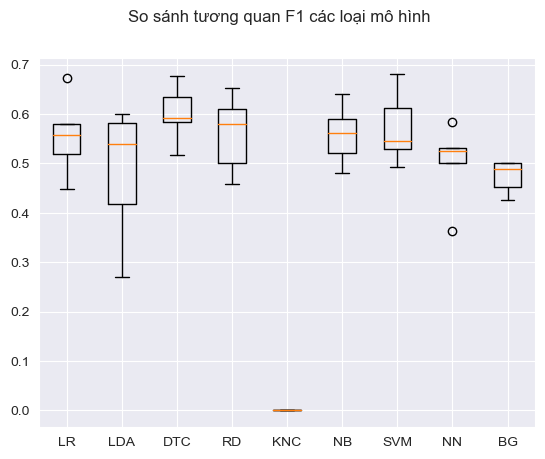

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


## 2 Mô hình đạt điểm cao nhất là:
    -SVM: Support Vector Machine
    -DTC: DecisionTreeClassifer


In [7]:
evaluate_result={}

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [17]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model1=SVC(class_weight=class_weights_dict)
model1.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.6555772994129159, 1: 2.106918238993711})

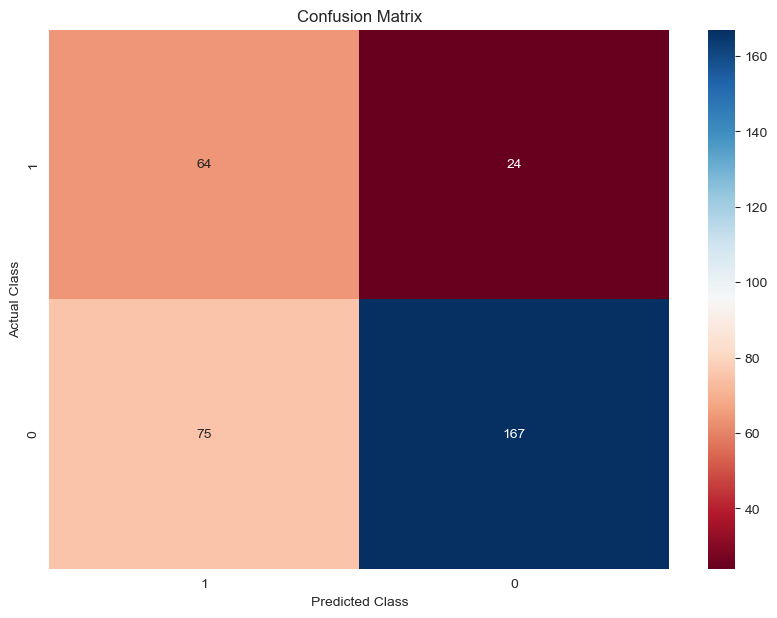

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       242
           1       0.46      0.73      0.56        88

    accuracy                           0.70       330
   macro avg       0.67      0.71      0.67       330
weighted avg       0.76      0.70      0.72       330



In [18]:
predictions = model1.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [21]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model2=DecisionTreeClassifier(class_weight=class_weights_dict)
model2.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.6555772994129159,
                                     1: 2.106918238993711})

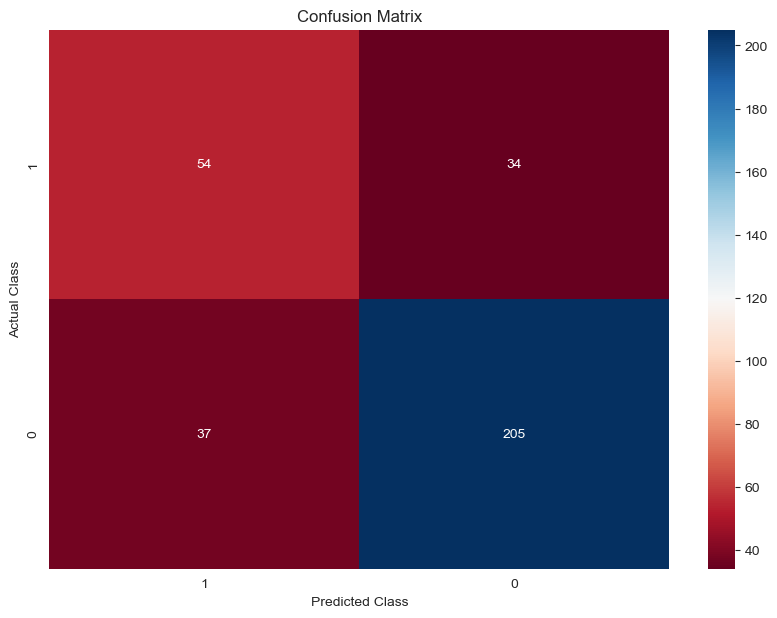

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       242
           1       0.59      0.61      0.60        88

    accuracy                           0.78       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.79      0.78      0.79       330



In [22]:
predictions = model2.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [25]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.62      0.72       242
           1       0.41      0.74      0.53        88

    accuracy                           0.65       330
   macro avg       0.64      0.68      0.63       330
weighted avg       0.75      0.65      0.67       330

GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       242
           1       0.43      0.52      0.47        88

    accuracy                           0.69       330
   macro avg       0.62      0.64      0.63       330
weighted avg       0.71      0.69      0.70       330

MLPClassifier
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       242
           1       0.47      0.41      0.44        88

    accuracy                           0.72       330
   macro avg       0.63      0.62      0.62       330
weighted avg       0.71      0

In [26]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [27]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [28]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model2, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: Y
Predicted: Y
----------------------------
Lần thứ 2: 
True: N
Predicted: Y
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: Y
----------------------------
Lần thứ 5: 
True: N
Predicted: N
----------------------------
Lần thứ 6: 
True: Y
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: N
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [29]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 7 chiếm khoảng 70.0% tổng lần dự đoán


In [30]:
solandung=0
hopdonggianlan=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model2.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
        if Y_check=='Y':
            hopdonggianlan+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [31]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")
print(f"Số lần phát hiện hợp đồng gian lận trong lan kiểm tra: {hopdonggianlan} chiếm khoảng {(hopdonggianlan/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 252 chiếm khoảng 76.36363636363637% tổng lần dự đoán
